In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [146]:
# dataset: http://web.mta.info/developers/turnstile.html
# mart nisan mayıs

df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210306.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210313.txt')  
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210320.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210327.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210403.txt')  
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210410.txt')  
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210417.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210424.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt')  
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt')  
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

df.columns = df.columns.str.strip()  #kolon adında boşluk vs. varsa kaldırır.

df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671


In [147]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717757 entries, 0 to 208911
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 248.8+ MB


(2717757, 11)

In [150]:
df.isna().sum() 

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
DATETIME    0
dtype: int64

In [151]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,2021-02-27 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,2021-02-28 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,2021-02-28 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,2021-02-28 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,2021-02-28 15:00:00


In [152]:
df['DAYNAME'] = pd.to_datetime(df['DATE']).dt.day_name()
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYNAME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,2021-02-27 23:00:00,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,2021-02-28 03:00:00,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,2021-02-28 07:00:00,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,2021-02-28 11:00:00,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,2021-02-28 15:00:00,Sunday


In [153]:
# Turnike adında bir feature oluşturuyoruz. Bu C/A, UNIT ve SCP kolonlarının birleşiminden oluşuyor. Turnikenin ıd'si kimliği oluyor.

df['TURNSTILE'] = df['C/A'] + df['UNIT'] + df['SCP']
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYNAME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00,Saturday,A002R05102-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00,Saturday,A002R05102-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00,Saturday,A002R05102-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00,Saturday,A002R05102-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00,Saturday,A002R05102-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,2021-02-27 23:00:00,Saturday,A002R05102-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,2021-02-28 03:00:00,Sunday,A002R05102-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,2021-02-28 07:00:00,Sunday,A002R05102-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,2021-02-28 11:00:00,Sunday,A002R05102-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,2021-02-28 15:00:00,Sunday,A002R05102-00-00


In [154]:
df.sort_values(["STATION","TURNSTILE","DATETIME"], inplace=True, ascending=True)
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYNAME,TURNSTILE
32697,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,03:00:00,REGULAR,209543,33537,2021-02-27 03:00:00,Saturday,H007AR24802-00-00
32698,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,07:00:00,REGULAR,209550,33539,2021-02-27 07:00:00,Saturday,H007AR24802-00-00
32699,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,11:00:00,REGULAR,209619,33548,2021-02-27 11:00:00,Saturday,H007AR24802-00-00
32700,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,15:00:00,REGULAR,209758,33568,2021-02-27 15:00:00,Saturday,H007AR24802-00-00
32701,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,19:00:00,REGULAR,209890,33580,2021-02-27 19:00:00,Saturday,H007AR24802-00-00
32702,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,23:00:00,REGULAR,209956,33598,2021-02-27 23:00:00,Saturday,H007AR24802-00-00
32703,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,03:00:00,REGULAR,209974,33604,2021-02-28 03:00:00,Sunday,H007AR24802-00-00
32704,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,07:00:00,REGULAR,209979,33606,2021-02-28 07:00:00,Sunday,H007AR24802-00-00
32705,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,11:00:00,REGULAR,210044,33614,2021-02-28 11:00:00,Sunday,H007AR24802-00-00
32706,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,15:00:00,REGULAR,210127,33631,2021-02-28 15:00:00,Sunday,H007AR24802-00-00


In [155]:
# 1 AV istasyonunda H007AR24802-00-00 turnikesinden 2022-01-29 03:00:00 tarih ve saatinde toplam kaç kişi geçmiş?
# O an bulunan seferden bir önceki seferdeki girişleri ve çıkışları çıkararak net giriş çıkışını buluruz.

df['_ENTRIES'] = df.ENTRIES.shift(-1) - df.ENTRIES
df['_EXITS'] = df.EXITS.shift(-1) - df.EXITS
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYNAME,TURNSTILE,_ENTRIES,_EXITS
32697,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,03:00:00,REGULAR,209543,33537,2021-02-27 03:00:00,Saturday,H007AR24802-00-00,7.0,2.0
32698,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,07:00:00,REGULAR,209550,33539,2021-02-27 07:00:00,Saturday,H007AR24802-00-00,69.0,9.0
32699,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,11:00:00,REGULAR,209619,33548,2021-02-27 11:00:00,Saturday,H007AR24802-00-00,139.0,20.0
32700,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,15:00:00,REGULAR,209758,33568,2021-02-27 15:00:00,Saturday,H007AR24802-00-00,132.0,12.0
32701,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,19:00:00,REGULAR,209890,33580,2021-02-27 19:00:00,Saturday,H007AR24802-00-00,66.0,18.0
32702,H007A,R248,02-00-00,1 AV,L,BMT,02/27/2021,23:00:00,REGULAR,209956,33598,2021-02-27 23:00:00,Saturday,H007AR24802-00-00,18.0,6.0
32703,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,03:00:00,REGULAR,209974,33604,2021-02-28 03:00:00,Sunday,H007AR24802-00-00,5.0,2.0
32704,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,07:00:00,REGULAR,209979,33606,2021-02-28 07:00:00,Sunday,H007AR24802-00-00,65.0,8.0
32705,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,11:00:00,REGULAR,210044,33614,2021-02-28 11:00:00,Sunday,H007AR24802-00-00,83.0,17.0
32706,H007A,R248,02-00-00,1 AV,L,BMT,02/28/2021,15:00:00,REGULAR,210127,33631,2021-02-28 15:00:00,Sunday,H007AR24802-00-00,90.0,19.0


In [156]:
#İstenmeyen özellikleri silme

df.drop(['C/A',	'UNIT',	'SCP',	'LINENAME', 'DIVISION', 'DESC', 'ENTRIES', 'EXITS'], axis=1, inplace=True)
df.head(10)

,STATION,DATE,TIME,DATETIME,DAYNAME,TURNSTILE,_ENTRIES,_EXITS
32697,1 AV,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,H007AR24802-00-00,7.0,2.0
32698,1 AV,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,H007AR24802-00-00,69.0,9.0
32699,1 AV,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,H007AR24802-00-00,139.0,20.0
32700,1 AV,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,H007AR24802-00-00,132.0,12.0
32701,1 AV,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,H007AR24802-00-00,66.0,18.0
32702,1 AV,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,H007AR24802-00-00,18.0,6.0
32703,1 AV,02/28/2021,03:00:00,2021-02-28 03:00:00,Sunday,H007AR24802-00-00,5.0,2.0
32704,1 AV,02/28/2021,07:00:00,2021-02-28 07:00:00,Sunday,H007AR24802-00-00,65.0,8.0
32705,1 AV,02/28/2021,11:00:00,2021-02-28 11:00:00,Sunday,H007AR24802-00-00,83.0,17.0
32706,1 AV,02/28/2021,15:00:00,2021-02-28 15:00:00,Sunday,H007AR24802-00-00,90.0,19.0


In [157]:
# yoğunluğu belirlemek için trafik sütunu oluşturuldu.
df['TRAFFIC'] = df['_ENTRIES'] + df['_EXITS']
df.head(10)

,STATION,DATE,TIME,DATETIME,DAYNAME,TURNSTILE,_ENTRIES,_EXITS,TRAFFIC
32697,1 AV,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,H007AR24802-00-00,7.0,2.0,9.0
32698,1 AV,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,H007AR24802-00-00,69.0,9.0,78.0
32699,1 AV,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,H007AR24802-00-00,139.0,20.0,159.0
32700,1 AV,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,H007AR24802-00-00,132.0,12.0,144.0
32701,1 AV,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,H007AR24802-00-00,66.0,18.0,84.0
32702,1 AV,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,H007AR24802-00-00,18.0,6.0,24.0
32703,1 AV,02/28/2021,03:00:00,2021-02-28 03:00:00,Sunday,H007AR24802-00-00,5.0,2.0,7.0
32704,1 AV,02/28/2021,07:00:00,2021-02-28 07:00:00,Sunday,H007AR24802-00-00,65.0,8.0,73.0
32705,1 AV,02/28/2021,11:00:00,2021-02-28 11:00:00,Sunday,H007AR24802-00-00,83.0,17.0,100.0
32706,1 AV,02/28/2021,15:00:00,2021-02-28 15:00:00,Sunday,H007AR24802-00-00,90.0,19.0,109.0


In [158]:
df.dropna(how ='any',inplace=True)
df.isna().sum() 

STATION      0
DATE         0
TIME         0
DATETIME     0
DAYNAME      0
TURNSTILE    0
_ENTRIES     0
_EXITS       0
TRAFFIC      0
dtype: int64

In [159]:
(df['TRAFFIC'] < 0).sum() #  Negatif değerlerin bir katkısı olmadığı için var mı diye kontrol ediyoruz.

24655

In [160]:
df['TRAFFIC'] = df['TRAFFIC'].apply(lambda x : x if x > 0 else 0)

In [161]:
(df['TRAFFIC'] < 0).sum()  # 0'a dönüştürebildik mi diye kontrol ediyoruz.

0

In [162]:
# tablo yaparken kolaylık olması adına hangi tarihin hangi güne denk geldiği belirliyoruz.
df['WEEKDAYS'] = pd.to_datetime(df['DATE']).dt.day_name()
df.head(10)

,STATION,DATE,TIME,DATETIME,DAYNAME,TURNSTILE,_ENTRIES,_EXITS,TRAFFIC,WEEKDAYS
32697,1 AV,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,H007AR24802-00-00,7.0,2.0,9.0,Saturday
32698,1 AV,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,H007AR24802-00-00,69.0,9.0,78.0,Saturday
32699,1 AV,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,H007AR24802-00-00,139.0,20.0,159.0,Saturday
32700,1 AV,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,H007AR24802-00-00,132.0,12.0,144.0,Saturday
32701,1 AV,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,H007AR24802-00-00,66.0,18.0,84.0,Saturday
32702,1 AV,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,H007AR24802-00-00,18.0,6.0,24.0,Saturday
32703,1 AV,02/28/2021,03:00:00,2021-02-28 03:00:00,Sunday,H007AR24802-00-00,5.0,2.0,7.0,Sunday
32704,1 AV,02/28/2021,07:00:00,2021-02-28 07:00:00,Sunday,H007AR24802-00-00,65.0,8.0,73.0,Sunday
32705,1 AV,02/28/2021,11:00:00,2021-02-28 11:00:00,Sunday,H007AR24802-00-00,83.0,17.0,100.0,Sunday
32706,1 AV,02/28/2021,15:00:00,2021-02-28 15:00:00,Sunday,H007AR24802-00-00,90.0,19.0,109.0,Sunday


In [167]:
# En çok ziyaret edilen 10 istasyon
_stations = df.groupby('STATION').sum().sort_values('TRAFFIC', ascending = False).reset_index().head(10)
_stations.head(10)

,STATION,_ENTRIES,_EXITS,TRAFFIC
0,34 ST-PENN STA,1.760289e+07,8.266763e+06,1.482489e+10
1,42 ST-PORT AUTH,-6.324414e+06,-9.852300e+06,9.421666e+09
2,125 ST,1.171782e+08,-2.584720e+05,8.836375e+09
3,161/YANKEE STAD,-1.627418e+09,-1.627548e+09,8.517244e+09
4,23 ST,8.818855e+06,2.962380e+05,8.270295e+09
5,CANAL ST,-3.716525e+08,-4.565382e+08,7.615007e+09
6,FULTON ST,5.774135e+06,1.990910e+06,6.906873e+09
7,34 ST-HERALD SQ,-2.861522e+07,-1.179761e+07,6.865609e+09
8,14 ST,-3.839450e+05,1.195310e+05,6.375018e+09
9,TIMES SQ-42 ST,-9.264626e+06,-1.239251e+07,6.372287e+09


Text(0.5, 1.0, 'TOP 10 STATIONS')

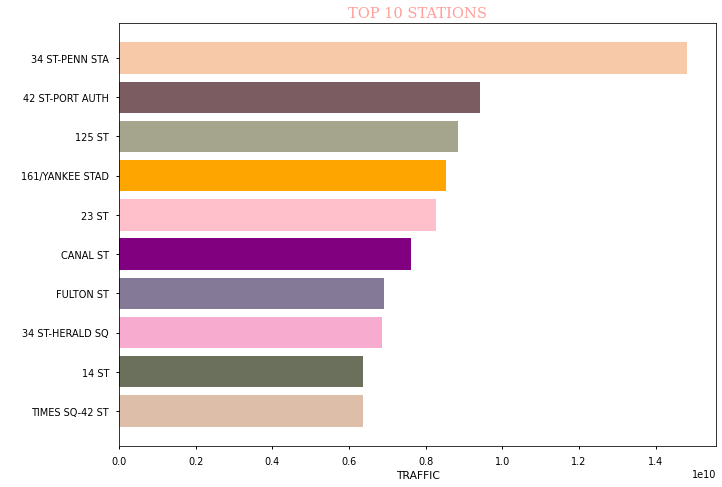

In [168]:
plt.figure(figsize=(11,8),dpi=70)
plt.barh(_stations.STATION, _stations.TRAFFIC, color=['#f8c9a8','#7A5C61','#A5A58D','orange','pink','purple','#847997','#F7ACCF','#6B705C','#DDBEA9']);
plt.gca().invert_yaxis()
plt.xlabel("TRAFFIC")
plt.ylabel(" ")
plt.title("TOP 10 STATIONS", family='serif',fontsize = 15,loc='center',color='r')

In [169]:
# Trafiğin yoğun olduğu günlere göre sıralama
_weekdays = df.groupby('WEEKDAYS').sum().sort_values('_ENTRIES', ascending = False).reset_index()
_weekdays

,WEEKDAYS,_ENTRIES,_EXITS,TRAFFIC
0,Wednesday,2.546828e+09,2.678482e+09,5.410438e+09
1,Tuesday,6.650770e+08,9.825124e+08,5.162635e+09
2,Friday,5.442108e+08,-8.277279e+08,3.314140e+11
3,Thursday,-3.802409e+07,-1.593973e+07,1.629111e+08
4,Saturday,-6.769518e+08,-4.277168e+08,1.533296e+08
5,Monday,-1.275102e+09,-7.404220e+08,3.440152e+09
6,Sunday,-1.766247e+09,-1.649221e+09,5.326128e+09


(0.0, 9000000000.0)

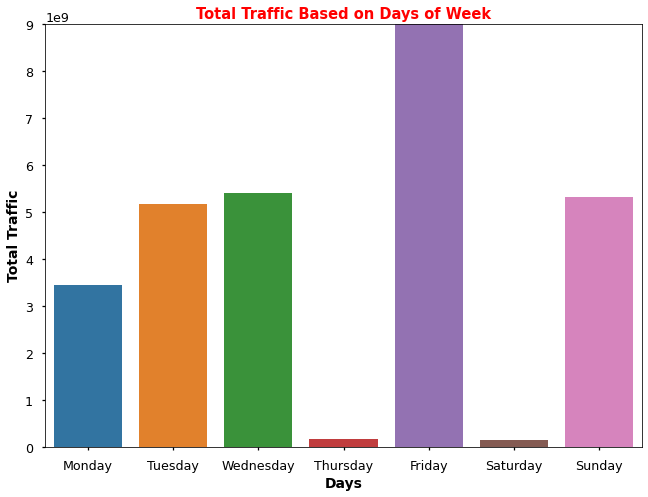

In [170]:
#Barplot for total traffic
plt.figure(figsize=(11,8),dpi=70),
plt.style.use('seaborn-talk')

ax = sns.barplot(data=_weekdays,x="WEEKDAYS",y="TRAFFIC", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sns.set_color_codes('pastel')
plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("Days",weight= "bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.ylim(0,9000000000)

In [171]:
# zamana göre gruplama yapalım.
_times = df.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()
_times.head(10)

,TIME,_ENTRIES,_EXITS,TRAFFIC
0,20:00:00,1.406903e+09,4.741933e+08,1.863239e+11
1,21:00:00,-1.586287e+09,-5.759693e+08,1.188776e+11
2,09:00:00,-3.670438e+08,1.066041e+09,9.358861e+09
3,20:22:00,-2.371702e+07,-5.699344e+07,8.516156e+09
4,22:00:00,-3.925970e+06,-1.761159e+06,7.355010e+09
5,23:00:00,4.460112e+06,1.362408e+07,4.528881e+09
6,09:04:35,1.862567e+09,1.409956e+09,3.272523e+09
7,13:00:00,1.573178e+09,5.077070e+08,2.882815e+09
8,08:00:00,3.335306e+08,-2.026439e+09,2.586855e+09
9,16:00:00,-1.611425e+09,-5.874269e+08,2.530122e+09


In [172]:
# Görüldüğü üzere saatler çok değişken, bunları gruplayalım. örneğin; 01.00-03.00 arasında olanlara direkt 03.00 desin

_times = df.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()

for i in range(len(_times)):
    
    if _times['TIME'][i] < ('04:00:00'):
        _times['TIME'][i] =  ('00:00 - 04:00')
    
    elif ('04:00:00') <= _times['TIME'][i] < ('08:00:00'):
        _times['TIME'][i] =  ('04:00 - 08:00')
    
    elif ('08:00:00') <= _times['TIME'][i] < ('12:00:00'):
        _times['TIME'][i] =  ('08:00 - 12:00')
    
    elif ('12:00:00') <= _times['TIME'][i] < ('16:00:00'):
        _times['TIME'][i] =  ('12:00 - 16:00')
    
    elif ('16:00:00') <= _times['TIME'][i] < ('20:00:00'):
        _times['TIME'][i] =  ('16:00 - 20:00')
    
    elif ('20:00:00') <= _times['TIME'][i]:
        _times['TIME'][i] =  ('20:00 - 00:00')
        
    i = i + 1

In [173]:
_times

,TIME,_ENTRIES,_EXITS,TRAFFIC
0,20:00 - 00:00,1.406903e+09,4.741933e+08,1.863239e+11
1,20:00 - 00:00,-1.586287e+09,-5.759693e+08,1.188776e+11
2,08:00 - 12:00,-3.670438e+08,1.066041e+09,9.358861e+09
3,20:00 - 00:00,-2.371702e+07,-5.699344e+07,8.516156e+09
4,20:00 - 00:00,-3.925970e+06,-1.761159e+06,7.355010e+09
...,...,...,...,...
56633,20:00 - 00:00,0.000000e+00,0.000000e+00,0.000000e+00
56634,04:00 - 08:00,0.000000e+00,0.000000e+00,0.000000e+00
56635,16:00 - 20:00,0.000000e+00,0.000000e+00,0.000000e+00
56636,04:00 - 08:00,0.000000e+00,0.000000e+00,0.000000e+00


In [174]:
_times = _times.groupby("TIME").sum().sort_values("TRAFFIC", ascending = False).reset_index()
_times

,TIME,_ENTRIES,_EXITS,TRAFFIC
0,20:00 - 00:00,-1.837044e+08,-1.214002e+08,3.258742e+11
1,08:00 - 12:00,2.412577e+08,-1.116881e+09,1.525154e+10
2,12:00 - 16:00,1.478649e+09,1.199068e+09,4.801385e+09
3,16:00 - 20:00,-1.589756e+09,6.006803e+07,3.458062e+09
4,04:00 - 08:00,1.938234e+08,6.336397e+06,1.641450e+09
5,00:00 - 04:00,-1.404787e+08,-2.722478e+07,4.292540e+07


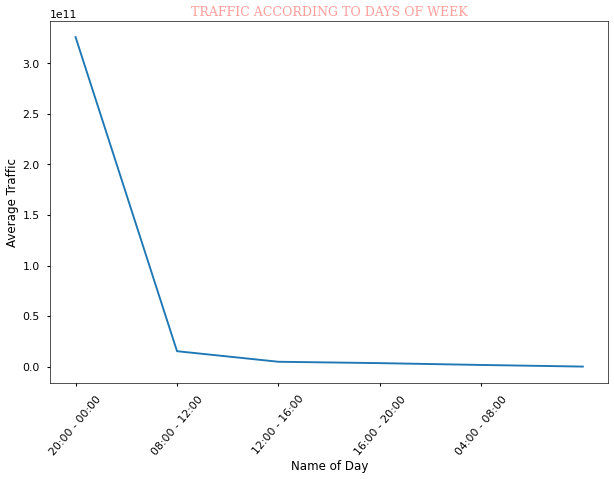

In [175]:
plt.figure(figsize=(12,8),dpi=60)
plt.plot(_times.TIME,_times.TRAFFIC);
plt.xlabel('Name of Day')
plt.ylabel('Average Traffic')
plt.title("TRAFFIC ACCORDING TO DAYS OF WEEK", family='serif',fontsize = 15,loc='center',color='r')
plt.xticks(np.arange(5), rotation=50);

In [184]:
# NYC Census Data
# Dataseti kaggle'dan alıyoruz. https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/data?select=nyc_census_tracts.csv
census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyc_census_tracts.csv')
census.head(10)

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
5,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,7.1,20.6,19.6,7.0,68.2,4.3,1.0,0.0,46.0,17.2
6,36005002300,Bronx,Bronx,4774,2130,2644,62.3,0.2,36.5,1.0,...,3.4,6.1,5.9,0.0,74.5,14.0,1.5,4.1,42.7,18.9
7,36005002400,Bronx,Bronx,150,109,41,0.0,52.0,48.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,0.0
8,36005002500,Bronx,Bronx,5355,2338,3017,76.5,1.5,18.9,0.0,...,8.6,14.7,12.6,2.8,62.5,17.7,1.8,2.7,35.5,9.4
9,36005002701,Bronx,Bronx,3016,1375,1641,68.0,0.0,31.2,0.0,...,4.9,13.5,14.0,1.7,64.7,18.0,0.0,1.6,42.8,15.2


In [185]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   County        2167 non-null   object 
 2   Borough       2167 non-null   object 
 3   TotalPop      2167 non-null   int64  
 4   Men           2167 non-null   int64  
 5   Women         2167 non-null   int64  
 6   Hispanic      2128 non-null   float64
 7   White         2128 non-null   float64
 8   Black         2128 non-null   float64
 9   Native        2128 non-null   float64
 10  Asian         2128 non-null   float64
 11  Citizen       2167 non-null   int64  
 12  Income        2110 non-null   object 
 13  IncomePerCap  2121 non-null   float64
 14  Poverty       2125 non-null   float64
 15  ChildPoverty  2107 non-null   float64
 16  Professional  2124 non-null   float64
 17  Service       2124 non-null   float64
 18  Office        2124 non-null 

In [187]:
# çok fazla kullanmayacağımız veri bulunmakta. bunları silelim.

census = census.drop([ 'CensusTract','Hispanic', 'White', 'Black', 'Native', 'Asian','Citizen','Poverty', 'ChildPoverty','Professional', 'Service', 'Office', 'Construction',
                        'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp','WorkAtHome', 'MeanCommute', 'Unemployment',], 1)
census.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,Bronx,Bronx,7703,7133,570,NaN,2440.0
1,Bronx,Bronx,5403,2659,2744,72034,22180.0
2,Bronx,Bronx,5915,2896,3019,74836,27700.0
3,Bronx,Bronx,5879,2558,3321,32312,17526.0
4,Bronx,Bronx,2591,1206,1385,37936,17986.0
5,Bronx,Bronx,8516,3301,5215,18086,12023.0
6,Bronx,Bronx,4774,2130,2644,14479,9781.0
7,Bronx,Bronx,150,109,41,NaN,49365.0
8,Bronx,Bronx,5355,2338,3017,17226,11493.0
9,Bronx,Bronx,3016,1375,1641,20153,10317.0


In [188]:
census.isna().sum() 

County           0
Borough          0
TotalPop         0
Men              0
Women            0
Income          57
IncomePerCap    46
dtype: int64

In [189]:
census.dropna(how ='any',inplace=True)
census.head(10)

,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
1,Bronx,Bronx,5403,2659,2744,72034,22180.0
2,Bronx,Bronx,5915,2896,3019,74836,27700.0
3,Bronx,Bronx,5879,2558,3321,32312,17526.0
4,Bronx,Bronx,2591,1206,1385,37936,17986.0
5,Bronx,Bronx,8516,3301,5215,18086,12023.0
6,Bronx,Bronx,4774,2130,2644,14479,9781.0
8,Bronx,Bronx,5355,2338,3017,17226,11493.0
9,Bronx,Bronx,3016,1375,1641,20153,10317.0
10,Bronx,Bronx,4778,2427,2351,17147,8911.0
11,Bronx,Bronx,5299,2292,3007,49529,26652.0


In [190]:
census.isna().sum() 

County          0
Borough         0
TotalPop        0
Men             0
Women           0
Income          0
IncomePerCap    0
dtype: int64

In [198]:
# New York'ta en fazla insanın olduğu ilçeleri bulmamız gerekiyor. İlçelere göre gruplandırma yapıyoruz. Sayı olarak en çoktan en aza doğru sıralıyoruz.
census_popu = census.groupby('Borough').sum().sort_values('Women', ascending = False).reset_index()
census_popu.head(10)

,Borough,TotalPop,Men,Women,IncomePerCap
0,Brooklyn,2593160,1227027,1366133,20842249.0
1,Queens,2300508,1114925,1185583,17730622.0
2,Manhattan,1627758,767966,859792,19480779.0
3,Bronx,1419859,665042,754817,6487755.0
4,Staten Island,472442,228699,243743,3413896.0


Text(0.5, 1.0, 'Population Distribution According to District')

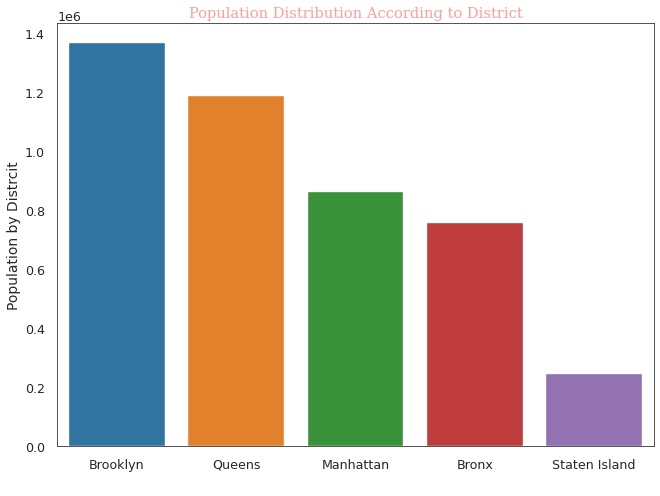

In [199]:
# Bunu grafiğe dönüştürelim. bar plot kullanıldı.
plt.figure(figsize=(11,8),dpi=70)
sns.set_style("white")
sns.barplot(x = 'Borough', y = 'Women', data = census_popu)
plt.ylabel("Population by Distrcit")
plt.xlabel(" ")
plt.title("Population Distribution According to District", family='serif',fontsize = 15,loc='center',color='r')


In [195]:
# Kişi başına düşen toplam gelire göre sıralayalım.
census_income = census.groupby("Borough").mean().sort_values("IncomePerCap", ascending = False).reset_index()
census_income.head(10)

,Borough,TotalPop,Men,Women,IncomePerCap
0,Manhattan,5834.258065,2752.566308,3081.691756,69823.580645
1,Staten Island,4415.345794,2137.373832,2277.971963,31905.570093
2,Brooklyn,3466.791444,1640.410428,1826.381016,27863.969251
3,Queens,3577.772939,1733.942457,1843.830482,27574.839813
4,Bronx,4263.840841,1997.123123,2266.717718,19482.747748


Text(0.5, 1.0, 'Average Per Capita Income ($) According to NYC Boroughs')

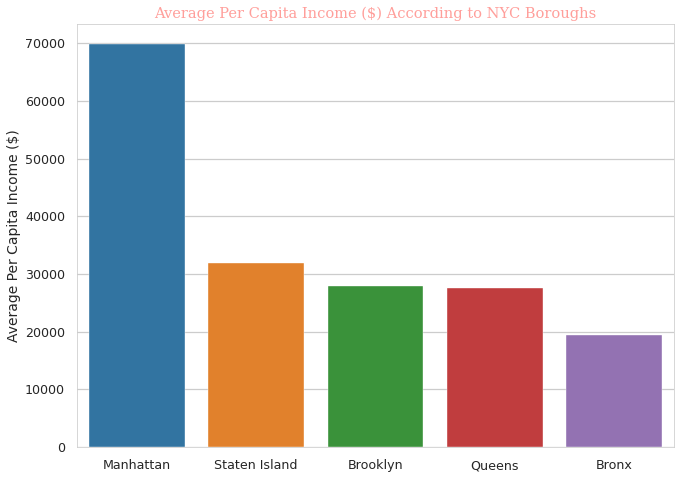

In [197]:
# Bunu grafiğe dönüştürelim. bar plot kullanıldı.
plt.figure(figsize=(11,8),dpi=70)
sns.set_style("whitegrid")
sns.barplot(x = 'Borough', y = 'IncomePerCap', data = census_income)
plt.ylabel("Average Per Capita Income ($)")
plt.xlabel(" ")
plt.title("Average Per Capita Income ($) According to NYC Boroughs", family='serif',fontsize = 15,loc='center',color='r')

1.Trafiğin en yoğun olduğu gün : Cuma günü 20.00-00.00 arası

2.En Fazla kadının olduğu semtler : Brooklyn-Queens-Manhattan

3.Kişi başı gelirin en fazla olduğu semtler : Manhattan-Staten Island-Brooklyn

4.En çok ziyaret edilen istasyonlar : 3 istasyon da Manhattan'da bulunmaktadır

*   34th Street–Penn
*   42 Street-Port Authority
*   125 ST	 	 

---
Yukarıdaki bilgiler doğrultusunda ekiplerimizi Cuma günü 20.00-00.00 arasında Manhattan'da bulunan 34th Street–Penn ve 42 Street-Port  Authority istasyonlarına koyabiliriz.